In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [2]:
vehicle_df = pd.read_csv('vehicle.csv').dropna()
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehicle_df_1 = vehicle_df.drop('class', axis=1)
vehicle_df_1_z = vehicle_df_1.apply(zscore)
vehicle_df_1_z

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
842,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
843,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
844,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


In [4]:
sc = StandardScaler()

X_standard = sc.fit_transform(vehicle_df_1)
X_standard

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

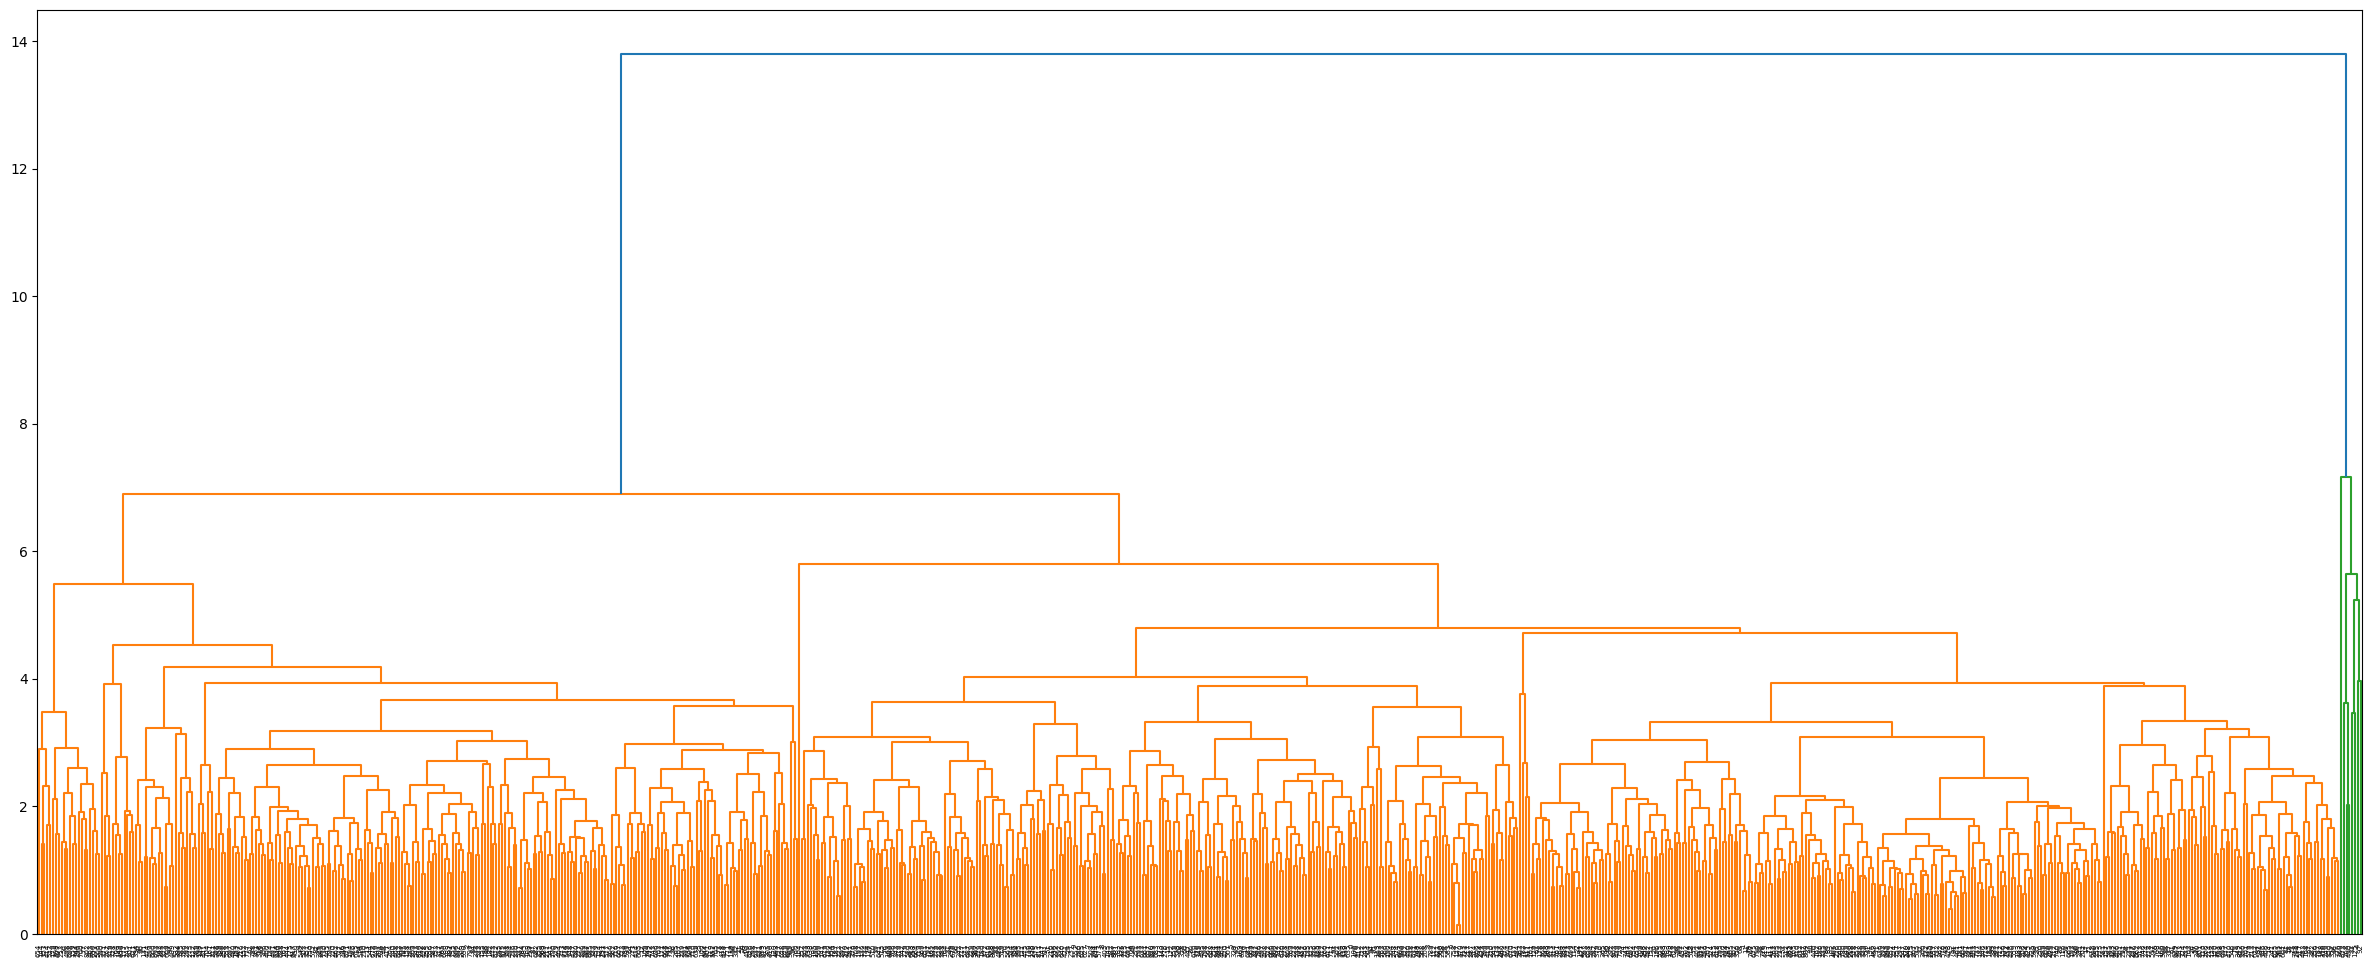

In [5]:
Z_df_average = linkage(X_standard, 'average', metric = 'euclidean')

plt.figure(figsize=(30,12))
dendrogram(Z_df_average)
plt.show()

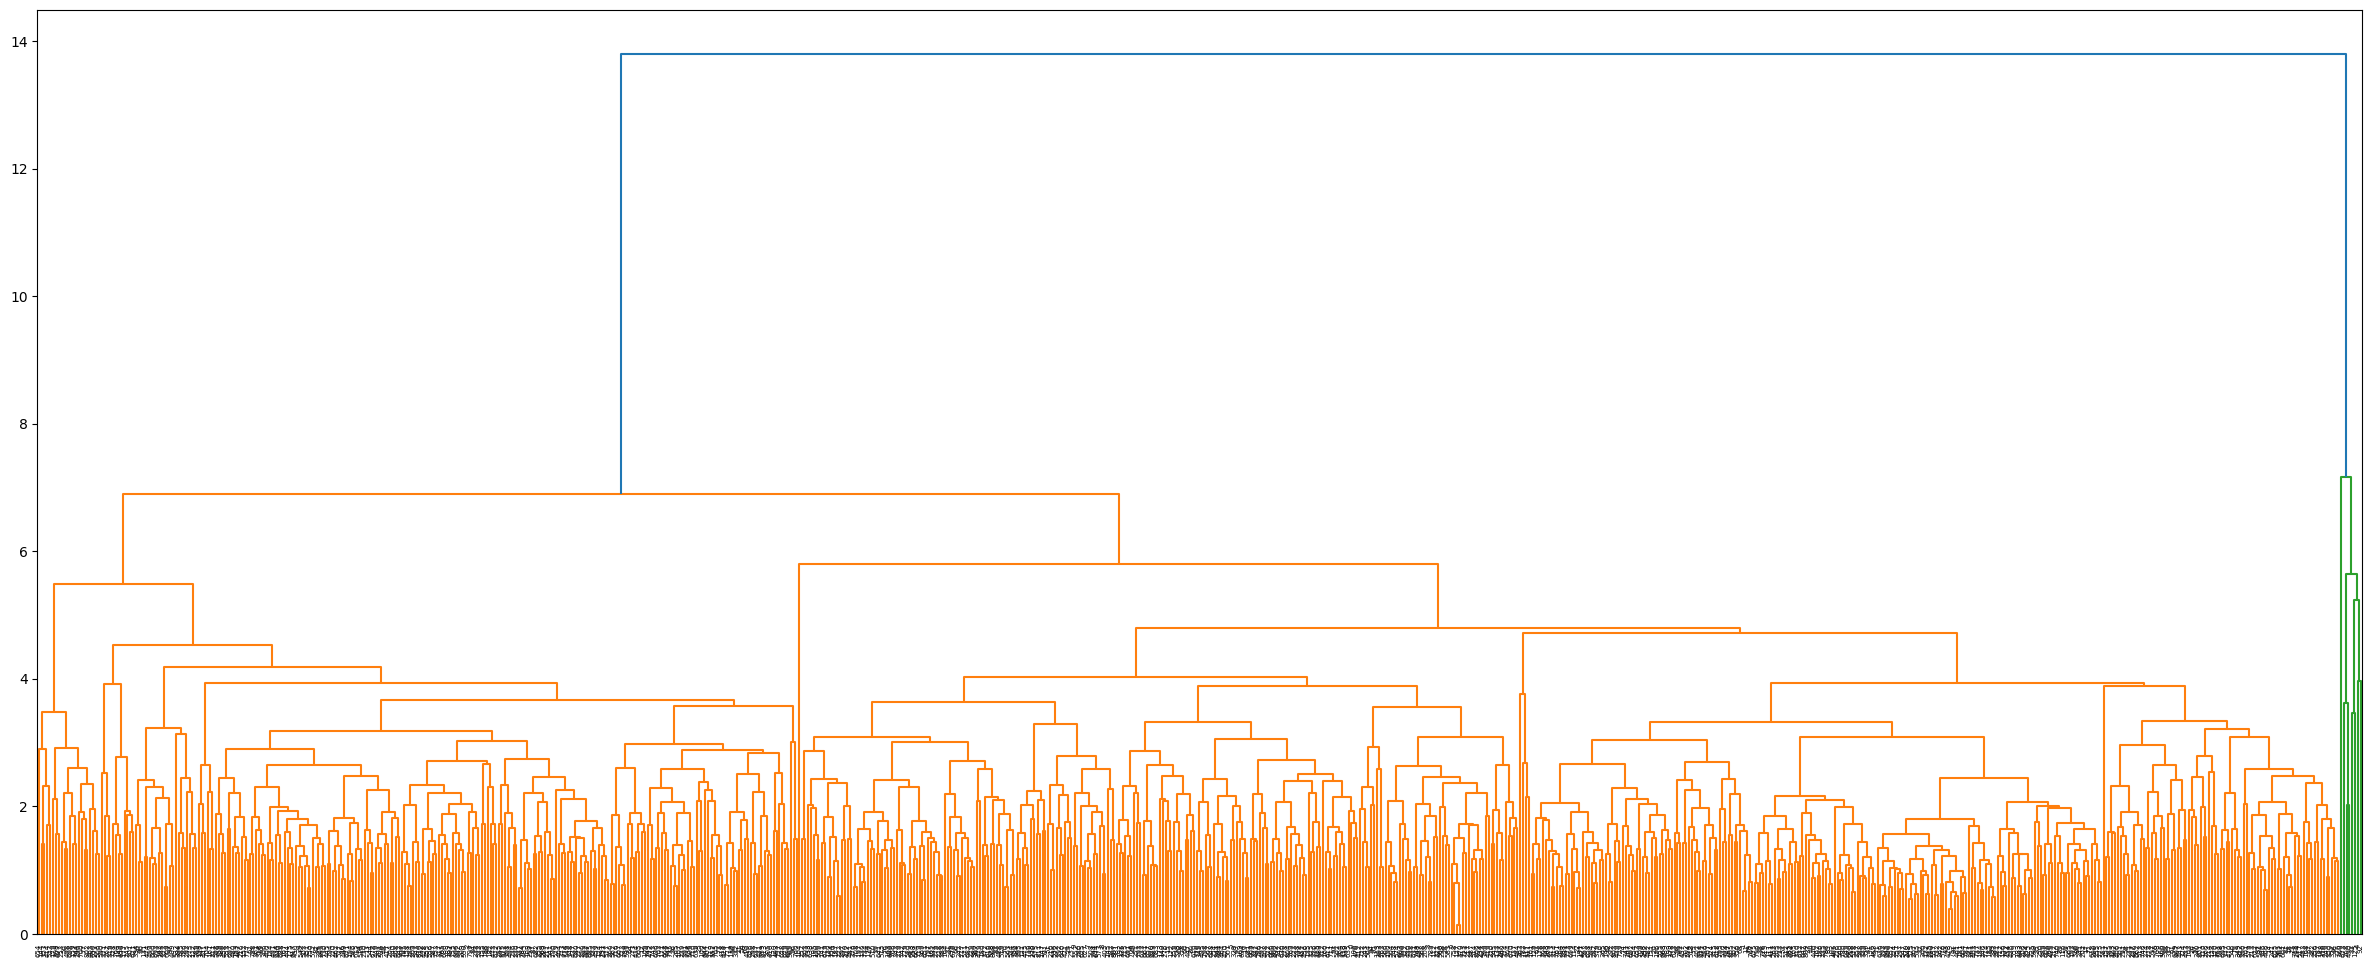

In [6]:
Z_df_ward = linkage(X_standard, 'ward', metric = 'euclidean')

plt.figure(figsize=(30,12))
dendrogram(Z_df_average)
plt.show()

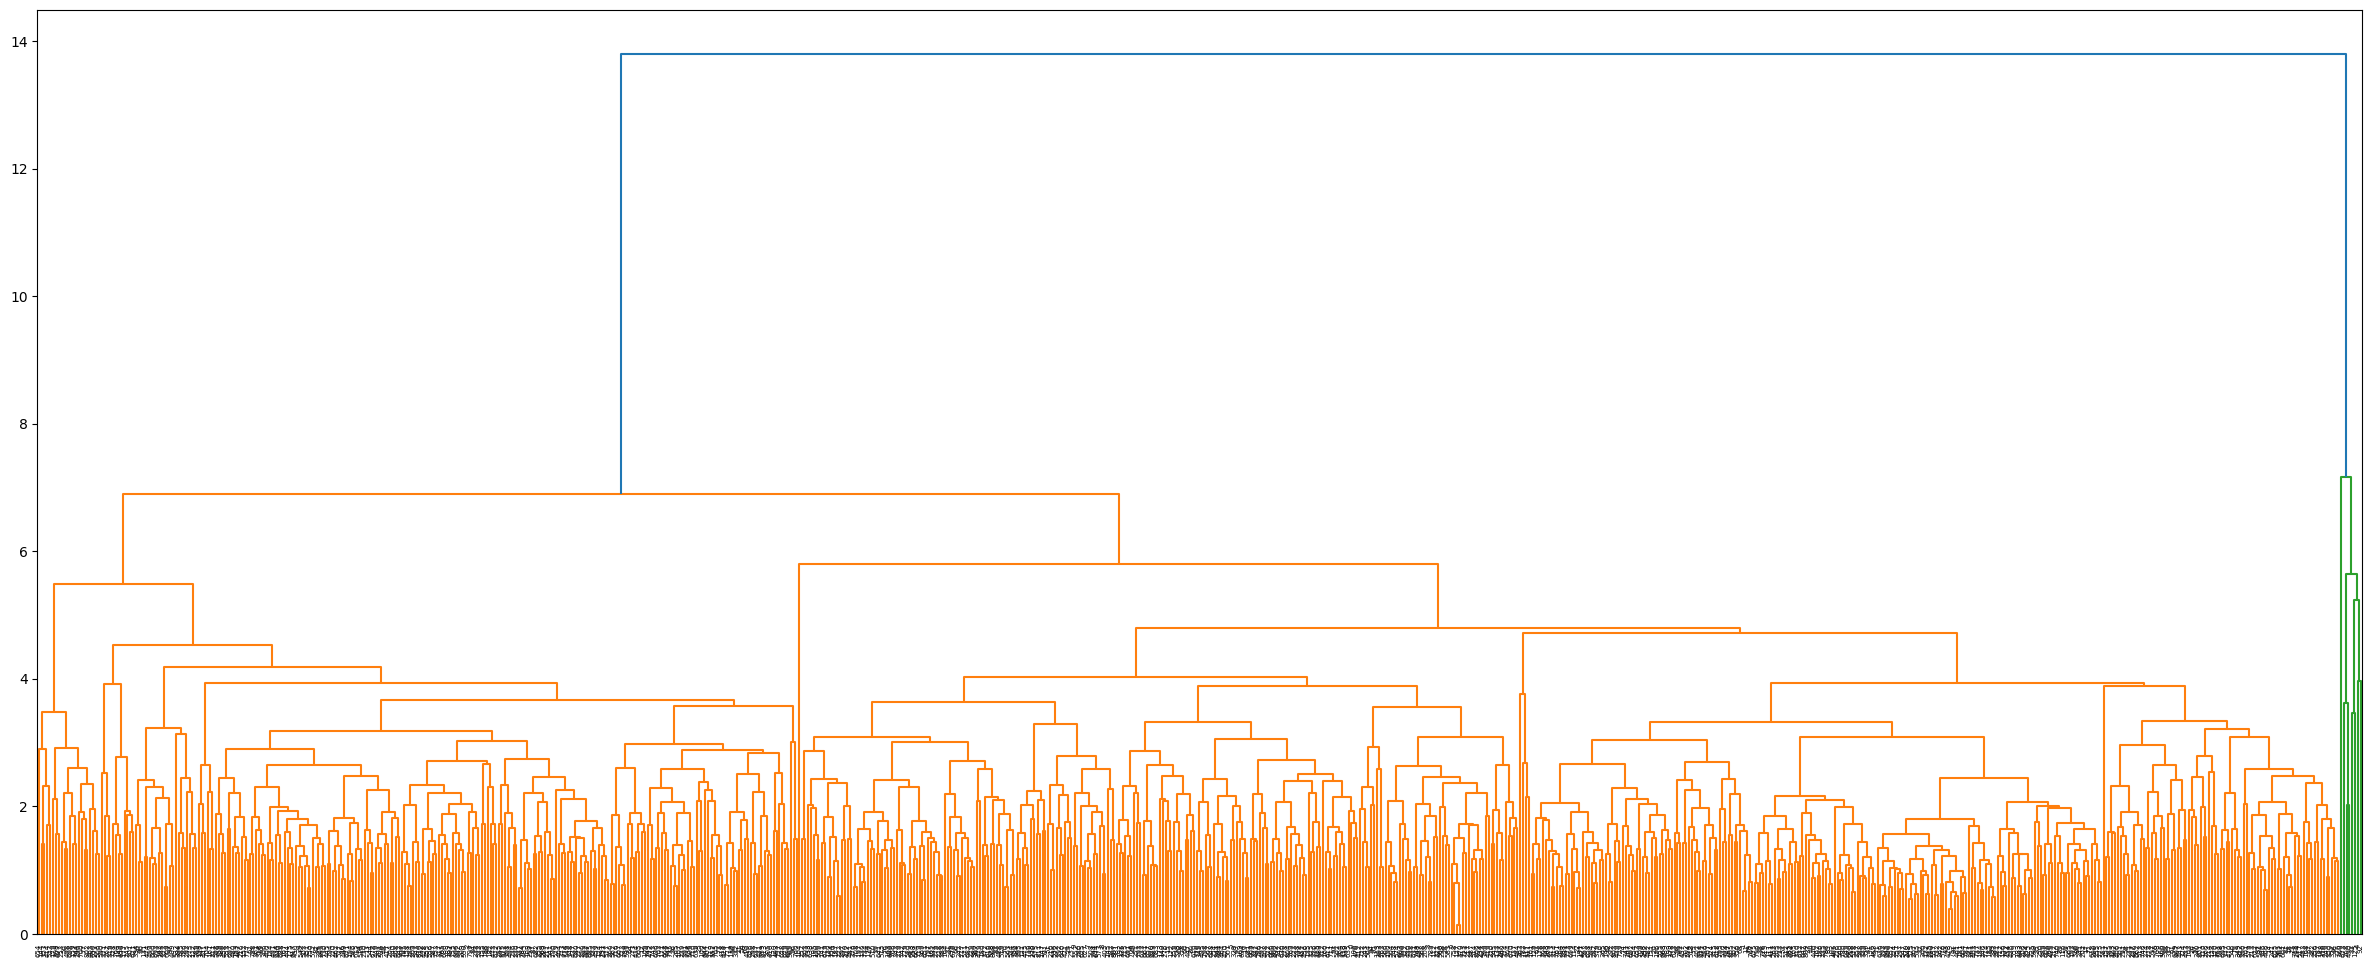

In [7]:
Z_df_complete = linkage(X_standard, 'complete', metric = 'euclidean')

plt.figure(figsize=(30,12))
dendrogram(Z_df_average)
plt.show()

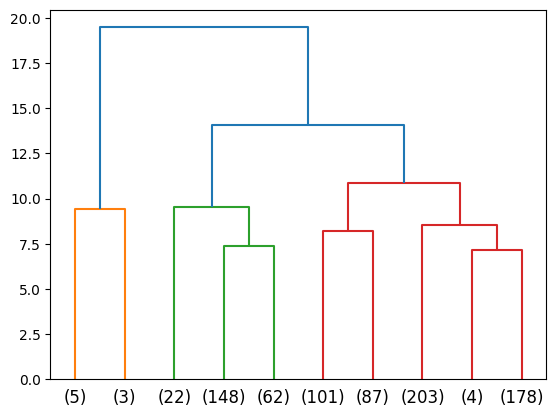

In [8]:
dendrogram(
    Z_df_complete,
    truncate_mode = 'lastp', p=10
)
plt.show()

In [9]:
from scipy.cluster.hierarchy import fcluster

In [17]:
max_distance = 8.5

hier_clusters = fcluster(Z_df_complete, max_distance, criterion='distance')


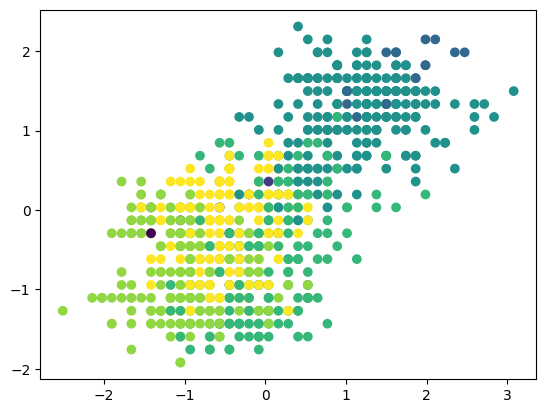

In [18]:
plt.scatter(X_standard[:,0], X_standard[:,1], c=hier_clusters)
plt.show()